In [1]:

import numpy as np
from copy import deepcopy
import warnings
import os
import sys
import shutil

from hera_sim.antpos import linear_array, hex_array
from hera_sim.vis import sim_red_data
from hera_sim.sigchain import gen_gains

from hera_cal import redcal as om
from hera_cal import io, abscal
from hera_cal.utils import split_pol, conj_pol, split_bl
from hera_cal.apply_cal import calibrate_in_place
from hera_cal.data import DATA_PATH
from hera_cal.datacontainer import DataContainer
from hera_cal.quantum_circuits import QuantumCircuitsLinearArray

from qalcore.qiskit.vqls.numpy_unitary_matrices import UnitaryDecomposition 
from qiskit.circuit.library.n_local.real_amplitudes import RealAmplitudes
from qiskit.algorithms.optimizers import COBYLA
from qiskit import Aer
import matplotlib.pyplot as plt
from qiskit_ibm_runtime import QiskitRuntimeService


In [8]:
NANTS = 2**2
NFREQ = 5
antpos = linear_array(NANTS)
circuits = QuantumCircuitsLinearArray(NANTS, NFREQ)

In [4]:
ibmq_token = "494a8792f270fe0072c01aa9fe2235dc645248bf699bf3473de20a36a31fcb6e4e5369614581bc30d27c3b1c888ef9204130908ecd05d80e5d6a82a7791d3430"
hub = "ibm-q-qal"
group = "escience"  # examnple 'escience'
project = "qradio"  # example qradio

QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token=ibmq_token,
    instance=hub + "/" + group + "/" + project,
    overwrite=True,
)

service = QiskitRuntimeService()

In [5]:
from qiskit.compiler import transpile
backend = service.backend('ibmq_belem')
transqc = transpile(circuits=circuits.circuits, backend=backend,  optimization_level=3, layout_method="sabre", routing_method="sabre")

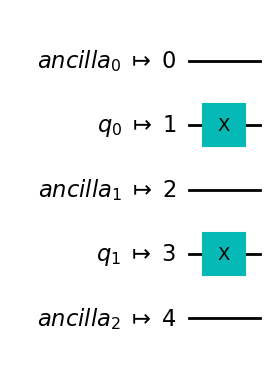

In [14]:
transqc[4].draw('mpl')

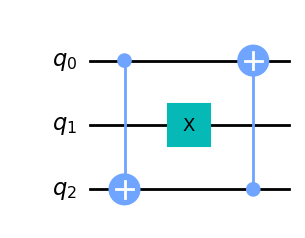

In [20]:
from qiskit import QuantumCircuit
qc= QuantumCircuit(3)
qc.cx(0,2)
qc.cx(2,0)
qc.x(1)
qc.draw('mpl')